# CS395 - Assignment 8
### Regression and Clustering

Date: April 21st, 2019  
By: Joshua Eli Swick

### 10. Clustering

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

points_n = 200 
clusters_n = 3
iteration_n = 100

points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

In [52]:
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1) 

In [53]:
distances = tf.reduce_sum(
    tf.square(
        tf.subtract(points_expanded, centroids_expanded)
    ),
    2
)
assignments = tf.argmin(distances, 0) 

In [54]:
means = []
for c in range(clusters_n):
    means.append(
        tf.reduce_mean(
            tf.gather(
                points,
                tf.reshape(
                    tf.where(
                        tf.equal(assignments, c)
                    ),
                    [1,-1]
                )
            ),
            reduction_indices=[1]
        )
    )
    
new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)

In [55]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(iteration_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
        
    print("centroids" + "\n", centroid_values)

centroids
 [[2.94734372 2.62464676]
 [7.95769945 5.0012055 ]
 [3.01786933 7.71711334]]


In [56]:
centroids_3_clusters = centroid_values

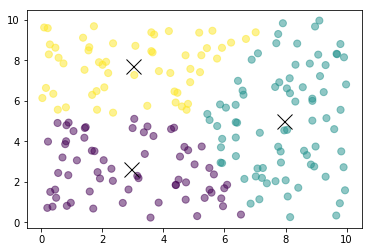

In [58]:
plt.scatter(
    points_values[:, 0],
    points_values[:, 1],
    c=assignment_values,
    s=50,
    alpha=0.5
)
plt.plot(
    centroid_values[:, 0],
    centroid_values[:, 1],
    'kx',
    markersize=15
)
plt.show()

### 11.
Change the number of clusters from 3 to 4. Does increasing the number of clusters improve the results?

centroids
 [[3.03460565 2.98787527]
 [2.348769   7.66126716]
 [7.62353556 7.43686311]
 [7.33805648 2.75513545]]


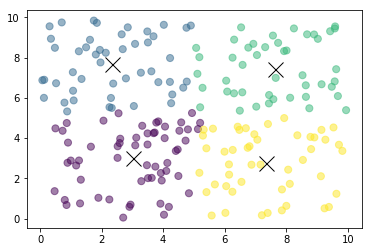

In [66]:
points_n = 200 
clusters_n = 4
iteration_n = 100

points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1) 

distances = tf.reduce_sum(
    tf.square(
        tf.subtract(points_expanded, centroids_expanded)
    ),
    2
)
assignments = tf.argmin(distances, 0) 

means = []
for c in range(clusters_n):
    means.append(
        tf.reduce_mean(
            tf.gather(
                points,
                tf.reshape(
                    tf.where(
                        tf.equal(assignments, c)
                    ),
                    [1,-1]
                )
            ),
            reduction_indices=[1]
        )
    )
    
new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(iteration_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
        
    print("centroids" + "\n", centroid_values)
    
centroids_4_clusters = centroid_values
    
plt.scatter(
    points_values[:, 0],
    points_values[:, 1],
    c=assignment_values,
    s=50,
    alpha=0.5
)
plt.plot(
    centroid_values[:, 0],
    centroid_values[:, 1],
    'kx',
    markersize=15
)
plt.show()

Increasing the number of clusters from 3 to 4 had a minimal impact on the quality of results. Although there are now four clusters, the *'clustering'* itself did not seem to improve.

### 12.
Write a script to calculate the amount of error (distance between the centroid and each point) with 3 and 4 clusters.

In [68]:
def centroid_error(centroid,points_values):
    centroid_x = centroid[0]
    centroid_y = centroid[1]
    print(f"\nCalculating error for {str(centroid)}.")
    for point in points_values:
        point_x = point[0]
        point_y = point[1]
        diff_x = centroid_x - point_x
        diff_y = centroid_y - point_y
        
        print(f"Error for point {point}: {diff_x:.3f}, {diff_y:.3f}")

In [69]:
# 3 clusters
for centroid in centroids_3_clusters:
    centroid_error(centroid,points_values)


Calculating error for [2.94734372 2.62464676].
Error for point [8.67780773 9.1560023 ]: -5.730, -6.531
Error for point [3.2772695  7.24914471]: -0.330, -4.624
Error for point [6.49188853 5.36198568]: -3.545, -2.737
Error for point [8.63495334 6.62210179]: -5.688, -3.997
Error for point [1.0938697  5.87151216]: 1.853, -3.247
Error for point [4.93841864 5.24517205]: -1.991, -2.621
Error for point [2.37839125 6.7086186 ]: 0.569, -4.084
Error for point [5.20178887 4.75476337]: -2.254, -2.130
Error for point [6.0238232  0.28152006]: -3.076, 2.343
Error for point [7.85747684 0.40417116]: -4.910, 2.220
Error for point [4.89990535 9.59402359]: -1.953, -6.969
Error for point [3.74751254 2.58009297]: -0.800, 0.045
Error for point [6.08207559 6.31173569]: -3.135, -3.687
Error for point [1.30097456 0.75099406]: 1.646, 1.874
Error for point [8.90455544 9.15001058]: -5.957, -6.525
Error for point [3.92601074 2.26145322]: -0.979, 0.363
Error for point [9.47963639 6.54993058]: -6.532, -3.925
Error fo

In [70]:
# 4 clusters
for centroid in centroids_4_clusters:
    centroid_error(centroid,points_values)


Calculating error for [3.03460565 2.98787527].
Error for point [8.67780773 9.1560023 ]: -5.643, -6.168
Error for point [3.2772695  7.24914471]: -0.243, -4.261
Error for point [6.49188853 5.36198568]: -3.457, -2.374
Error for point [8.63495334 6.62210179]: -5.600, -3.634
Error for point [1.0938697  5.87151216]: 1.941, -2.884
Error for point [4.93841864 5.24517205]: -1.904, -2.257
Error for point [2.37839125 6.7086186 ]: 0.656, -3.721
Error for point [5.20178887 4.75476337]: -2.167, -1.767
Error for point [6.0238232  0.28152006]: -2.989, 2.706
Error for point [7.85747684 0.40417116]: -4.823, 2.584
Error for point [4.89990535 9.59402359]: -1.865, -6.606
Error for point [3.74751254 2.58009297]: -0.713, 0.408
Error for point [6.08207559 6.31173569]: -3.047, -3.324
Error for point [1.30097456 0.75099406]: 1.734, 2.237
Error for point [8.90455544 9.15001058]: -5.870, -6.162
Error for point [3.92601074 2.26145322]: -0.891, 0.726
Error for point [9.47963639 6.54993058]: -6.445, -3.562
Error fo

Error for point [9.02687234 8.93198325]: -1.689, -6.177
Error for point [9.62271455 7.42295122]: -2.285, -4.668
Error for point [1.1746951  2.63599529]: 6.163, 0.119
Error for point [0.88169215 5.32354562]: 6.456, -2.568
Error for point [9.57456551 6.81661534]: -2.237, -4.061
Error for point [7.02622341 5.56147426]: 0.312, -2.806
Error for point [3.62925684 2.02101222]: 3.709, 0.734
Error for point [8.1268624  6.00355044]: -0.789, -3.248
Error for point [4.22063827 6.79058044]: 3.117, -4.035
Error for point [0.12740515 5.998673  ]: 7.211, -3.244
Error for point [7.58143539 5.93007125]: -0.243, -3.175
Error for point [8.63967106 6.04863788]: -1.302, -3.294
Error for point [7.93368172 4.99341137]: -0.596, -2.238
Error for point [2.51914616 3.01530068]: 4.819, -0.260
Error for point [6.58216401 7.63717868]: 0.756, -4.882
Error for point [9.42650739 9.3093905 ]: -2.088, -6.554
Error for point [3.09477212 3.6385732 ]: 4.243, -0.883
Error for point [6.57207007 6.27354611]: 0.766, -3.518
Erro

### 13.
How do the reduction of error and the number of clusters affect the *informativeness* of the data. Is there a tradeoff?

centroids
 [[4.00817598 4.56897733]
 [1.43499974 1.77338339]
 [9.13972145 5.0646888 ]
 [1.39002684 4.76284947]
 [1.03758242 8.49914093]
 [2.43456961 7.01917488]
 [6.50337808 5.72003108]
 [8.07883993 1.53027914]
 [4.67382086 1.70434498]
 [7.56597411 9.14248045]]


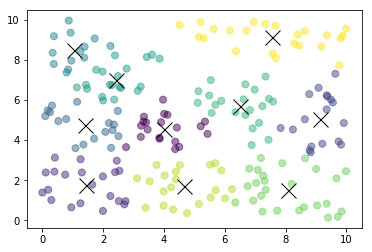

In [72]:
points_n = 200 
clusters_n = 10
iteration_n = 100

points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1) 

distances = tf.reduce_sum(
    tf.square(
        tf.subtract(points_expanded, centroids_expanded)
    ),
    2
)
assignments = tf.argmin(distances, 0) 

means = []
for c in range(clusters_n):
    means.append(
        tf.reduce_mean(
            tf.gather(
                points,
                tf.reshape(
                    tf.where(
                        tf.equal(assignments, c)
                    ),
                    [1,-1]
                )
            ),
            reduction_indices=[1]
        )
    )
    
new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(iteration_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
        
    print("centroids" + "\n", centroid_values)
    
centroids_10_clusters = centroid_values
    
plt.scatter(
    points_values[:, 0],
    points_values[:, 1],
    c=assignment_values,
    s=50,
    alpha=0.5
)
plt.plot(
    centroid_values[:, 0],
    centroid_values[:, 1],
    'kx',
    markersize=15
)
plt.show()

In [73]:
for centroid in centroids_10_clusters:
    centroid_error(centroid,points_values)


Calculating error for [4.00817598 4.56897733].
Error for point [9.67681782 2.09406344]: -5.669, 2.475
Error for point [5.69268069 5.75974182]: -1.685, -1.191
Error for point [5.88842563 5.95490302]: -1.880, -1.386
Error for point [9.35177275 0.82894075]: -5.344, 3.740
Error for point [3.85023586 4.10538405]: 0.158, 0.464
Error for point [6.95386643 9.89591369]: -2.946, -5.327
Error for point [5.15066257 9.14779881]: -1.142, -4.579
Error for point [3.60969554 8.26288036]: 0.398, -3.694
Error for point [1.14286983 5.91214443]: 2.865, -1.343
Error for point [2.38996451 8.22509114]: 1.618, -3.656
Error for point [0.5271345  4.95131235]: 3.481, -0.382
Error for point [2.73708126 0.95528514]: 1.271, 3.614
Error for point [7.57520951 8.31582338]: -3.567, -3.747
Error for point [9.39663579 0.13419454]: -5.388, 4.435
Error for point [9.63737484 7.30638231]: -5.629, -2.737
Error for point [2.31235656 4.49589137]: 1.696, 0.073
Error for point [3.75949048 2.7651491 ]: 0.249, 1.804
Error for point

Error for point [0.09689268 5.19861883]: 0.941, 3.301
Error for point [9.80841635 9.06880721]: -8.771, -0.570
Error for point [0.84981515 7.52073389]: 0.188, 0.978
Error for point [7.34547433 1.51498064]: -6.308, 6.984
Error for point [5.34941248 4.92523356]: -4.312, 3.574
Error for point [3.3418238 5.1685488]: -2.304, 3.331
Error for point [3.43492925 8.1445411 ]: -2.397, 0.355
Error for point [2.50400944 4.19763992]: -1.466, 4.302
Error for point [5.14945356 0.81241826]: -4.112, 7.687
Error for point [3.11434256 2.08920856]: -2.077, 6.410
Error for point [7.7249843  0.48077325]: -6.687, 8.018
Error for point [4.39560042 2.42640398]: -3.358, 6.073
Error for point [4.24026852 1.64809479]: -3.203, 6.851
Error for point [2.00033081 5.97681416]: -0.963, 2.522
Error for point [7.31079295 1.96842404]: -6.273, 6.531
Error for point [3.1397603  6.46063243]: -2.102, 2.039
Error for point [3.23920965 4.1628353 ]: -2.202, 4.336
Error for point [8.44746126 8.71439896]: -7.410, -0.215
Error for po

Error for point [9.37615268 6.18315982]: -4.702, -4.479
Error for point [1.25042439 8.43951615]: 3.423, -6.735
Error for point [6.37068994 8.43638857]: -1.697, -6.732
Error for point [0.11504439 2.3836744 ]: 4.559, -0.679
Error for point [7.83778376 4.60211531]: -3.164, -2.898
Error for point [1.99291296 0.46745909]: 2.681, 1.237
Error for point [3.85593846 8.06308912]: 0.818, -6.359
Error for point [7.89619558 2.84680576]: -3.222, -1.142
Error for point [4.36890805 3.55239269]: 0.305, -1.848
Error for point [2.22518299 6.76074009]: 2.449, -5.056
Error for point [2.39277249 2.39894907]: 2.281, -0.695
Error for point [6.82514977 5.49569356]: -2.151, -3.791
Error for point [0.86800735 9.96337519]: 3.806, -8.259
Error for point [8.19991591 1.81317413]: -3.526, -0.109
Error for point [2.53893326 6.66543299]: 2.135, -4.961
Error for point [8.7913557  3.49423569]: -4.118, -1.790
Error for point [1.1366682  6.62572275]: 3.537, -4.921
Error for point [6.23786277 1.55552712]: -1.564, 0.149
Erro

In this model, adding inceasing the number of clusters from 3 to 4 slightly reduced the error, but increasing the number of clusters to 10 caused an increase in error. As with most things related to model accuracy , the exact implementation and parameters depend on the model being tuned appropriately. Adjusting the settings too far one way or another will hurt the affectiveness of the model.